# Statistical Property of simulated financial data

In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels as smd
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
def gen_paths(S0=100, r=0.05, sigma=0.25, T=1, M=200, I=10000):
    ''' Generates Monte Carlo paths for geometric Brownian motion.
    Parameters
    ==========
    S0 : initial stock
    r : interest rate
    sigma : volatility
    T : time to maturity
    M : M+1 nodes on each path
    I : number of paths
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)   # Each column is a path
    paths[0,:] = S0                            # First element of each col (path) is S0
    for t in range(1, M + 1):                  # M points in this range, making M+1 points in all with the initial value
        rand = np.random.standard_normal(I)    # Get a std normal draw for each path
        rand = (rand - rand.mean()) / rand.std()   # Make sure the random number set for each point has mean 0, std 1 
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
            sigma * np.sqrt(dt) * rand)
    return paths

In [3]:
?gen_paths

In [4]:
m=500
paths = gen_paths(M=m)
print(paths.shape)

(501, 10000)


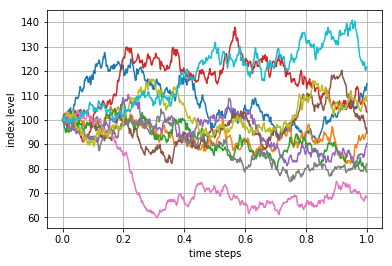

In [5]:
t=np.linspace(0,1,501)
plt.plot(t,paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [6]:
log_returns=np.log(paths[1:]/paths[0:-1])  # 1: has 50 elements, 0:-1 is the set of numbers without the last number, also 50 in number
type(log_returns)

numpy.ndarray

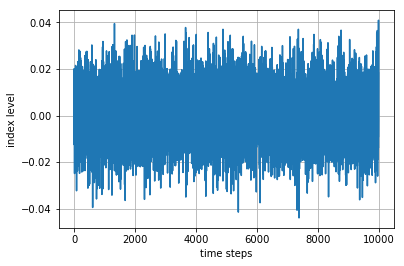

In [7]:
plt.plot(log_returns[1])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [8]:
paths[:20, 0].round(4)

array([ 100.    ,   99.1291,  100.1754,   99.7879,  100.2132,  101.0193,
        100.7721,  101.2764,  102.5073,  103.4246,  103.9723,  103.7605,
        102.5178,  104.8511,  101.9526,  101.9256,  103.5201,  103.8152,
        104.9093,  106.255 ])

In [9]:
log_returns[:20, 0].round(4)

array([-0.0087,  0.0105, -0.0039,  0.0043,  0.008 , -0.0025,  0.005 ,
        0.0121,  0.0089,  0.0053, -0.002 , -0.012 ,  0.0225, -0.028 ,
       -0.0003,  0.0155,  0.0028,  0.0105,  0.0127, -0.0025])

In [10]:
?scs

In [11]:
def print_statistics(array):  
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))


In [12]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size   5000000.00000
           min        -0.05873
           max         0.06042
          mean         0.00004
           std         0.01118
          skew         0.00024
      kurtosis         0.00204


0.0089442719099991595

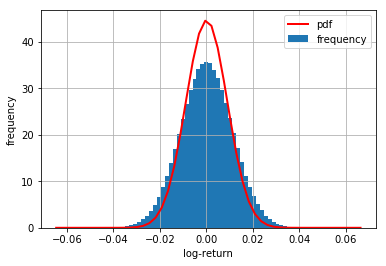

In [13]:
plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
r=0.05
sigma=0.2        
M=m
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),color='r', lw=2.0, label='pdf')
# loc is the mean, scale is the std
plt.legend()
sigma/np.sqrt(M)

In [14]:
?scs.norm

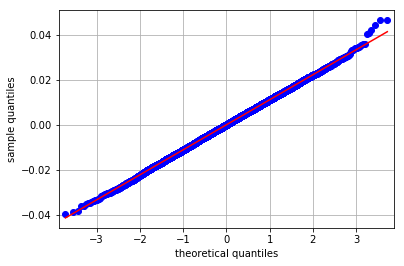

In [15]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [16]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    print ("Skew of data set %14.3f" % scs.skew(arr))
    print ("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print ("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print ("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print ("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

In [17]:
normality_tests(log_returns.flatten())

Skew of data set          0.000
Skew test p-value          0.829
Kurt of data set          0.002
Kurt test p-value          0.351
Norm test p-value          0.633


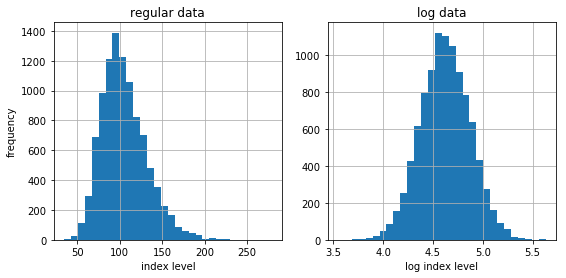

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))       # subplots 1 row and 2 columns, figsize in cm
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [19]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size     10000.00000
           min        34.70203
           max       278.58914
          mean       105.08332
           std        26.51913
          skew         0.78178
      kurtosis         1.12167


In [20]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size     10000.00000
           min         3.54680
           max         5.62974
          mean         4.62392
           std         0.24829
          skew         0.00415
      kurtosis         0.02645


In [21]:
normality_tests(np.log(paths[-1]))

Skew of data set          0.004
Skew test p-value          0.865
Kurt of data set          0.026
Kurt test p-value          0.569
Norm test p-value          0.838


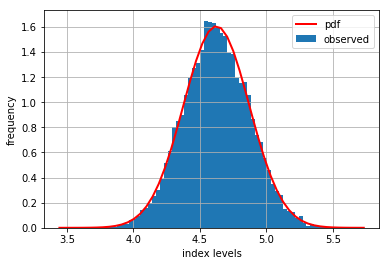

In [22]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
'r', lw=2.0, label='pdf')
plt.legend()

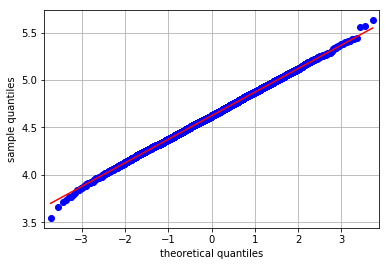

In [23]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

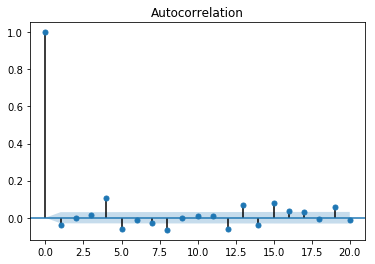

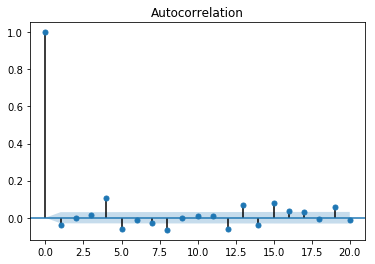

In [24]:
smd.graphics.tsaplots.plot_acf(log_returns[:,0], lags=20, alpha=0.5)

In [25]:
log_returns[:,0].size

500